In [2]:
from O.MM.sc_system import *

''' n_mol_unitcell
bcc : 2
fcc : 4
'''

name = 'argon'
PATH = DIR_main+f'MM/molecules/{name}/'

FF_class = LJ
FF_name = FF_class.FF_name

print('FF name:', FF_name)

FF name: LJ


In [2]:
# FF settings (for the LJ potential):
LR_cutoff = 0.7 # nm 
SwitchingFunction_factor = 0.8
T = 70

# MD

# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/argon/argon_bcc_unitcell_cell444.pdb
n_molecules: 128

# initialise_system:
set PME cutoff to: 0.7 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.5599999999999999 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
no corrections to self.system
n_mol =  128, n_atoms_mol = 1, N = 128, n_DOF = 381 (n_constraints = 3) 

# initialise_simulation:
set temperature: 70 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
setting barostat ( MonteCarloFlexibleBarostat ) to P = 1 atm, at 70 K, trying every 25 frames.
minimise = True, minimising potential energy (u):
u before minimisation: -601.3753876216302 kT
u after  minimisation: -601.3753876216302 kT



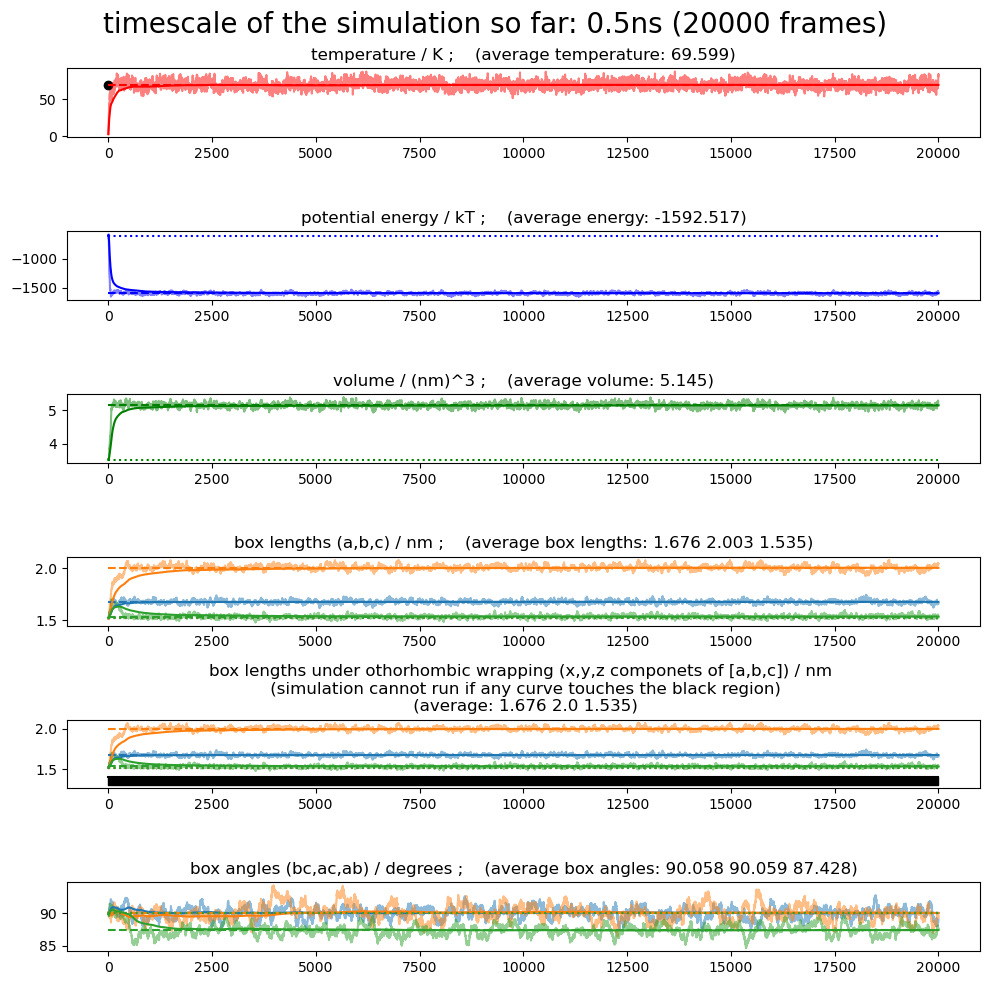

saved ./O/MM/molecules/argon//data/NPT/argon_LJ_0.7_0.8_NPT_dataset_Form_bcc_Cell_444_Temp_70
saved: check_bcc_444_LJ_0.7_0.8.gro
CHECK: average lattice potential energy: -12.441542235643398 /kT
u before minimisation: -1604.9618866494372 kT
u after  minimisation: -1748.6522830023684 kT
saved: ./O/MM/molecules/argon//argon_LJ_0.7_0.8_equilibrated_Form_bcc_Cell_444_Temp_70.pdb
# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/argon/argon_fcc_unitcell_cell333.pdb
n_molecules: 108

# initialise_system:
set PME cutoff to: 0.7 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.5599999999999999 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
no corrections to self.system
n_mol =  108, n_atoms_mol = 1, N = 108, n_DOF = 321 (n_constraints = 3) 

# initialise_simulation:
set temperature: 70 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
setting barostat ( MonteCarloFlexibleBa

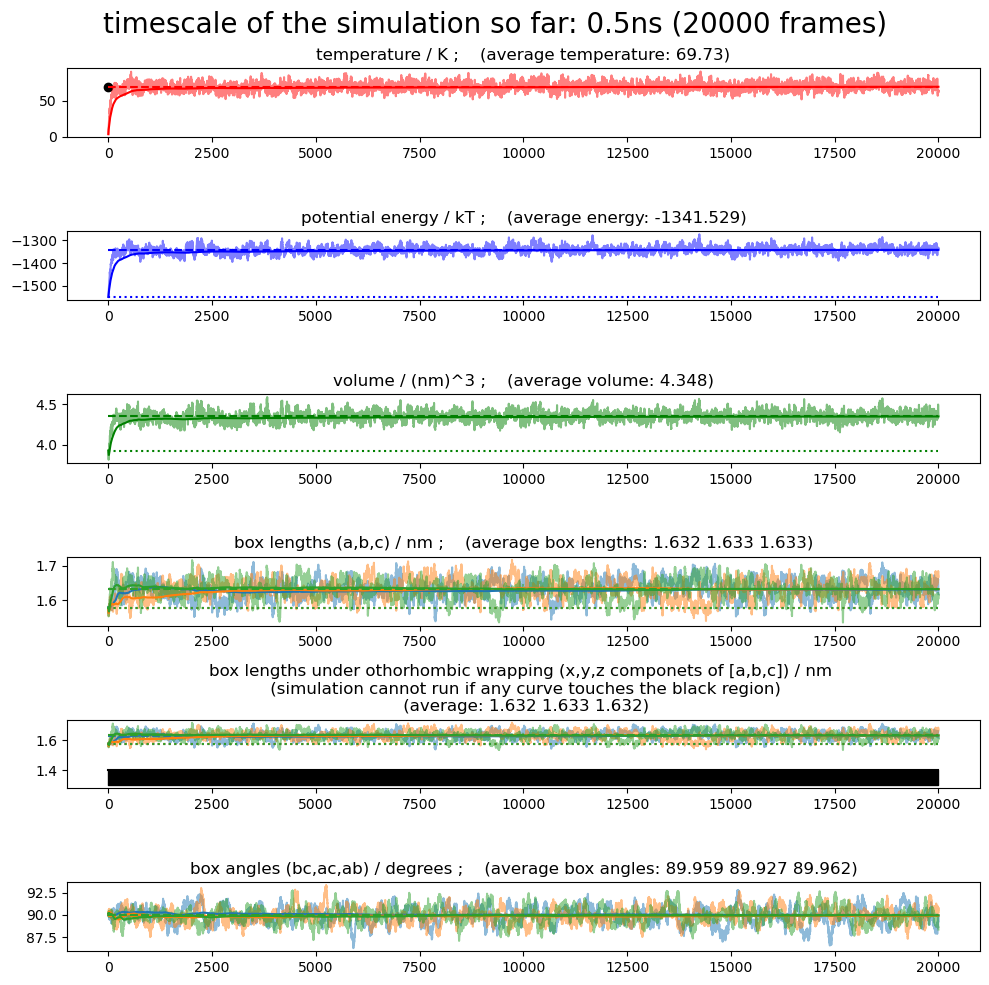

saved ./O/MM/molecules/argon//data/NPT/argon_LJ_0.7_0.8_NPT_dataset_Form_fcc_Cell_333_Temp_70
saved: check_fcc_333_LJ_0.7_0.8.gro
CHECK: average lattice potential energy: -12.421566833634936 /kT
u before minimisation: -1340.804624029984 kT
u after  minimisation: -1475.5017860030816 kT
saved: ./O/MM/molecules/argon//argon_LJ_0.7_0.8_equilibrated_Form_fcc_Cell_333_Temp_70.pdb


' the above script outputs were:\n\n###############################################################################################\n# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):\n ./O//MM/molecules/argon/argon_bcc_unitcell_cell444.pdb\nn_molecules: 128\n\n# initialise_system:\nset PME cutoff to: 0.7 nm\nremoveCMMotion active: True\nset SwitchingFunction to 0.8 * PME_cutoff = 0.5599999999999999 nm\nadjusted EwaldErrorTolerance from 0.0005 to 0.0001\nn_mol =  128, n_atoms_mol = 1, N = 128, n_DOF = 381 (n_constraints = 3) \n\n# initialise_simulation:\nset temperature: 70 Kelvin\nset integration timestep: 0.0005 ps\nset collision rate (friction ceofficent): 1 /ps\nsetting barostat ( MonteCarloFlexibleBarostat ) to P = 1 atm, at 70 K, trying every 25 frames.\nminimise = True, minimising potential energy (u):\nu before minimisation: -601.3754040074383 kT\nu after  minimisation: -601.3754040074383 kT\n\nframe: 20000 T sampled:70.114 T expected:70\n\nsaved ./O/M

In [3]:
# NPT equlibration was done in both forms using this script:

for Form, cell_str in zip(['bcc','fcc'],['444', '333']):
    
    sc = SingleComponent(
                    PDB = f'{PATH}/{name}_{Form}_unitcell_cell{cell_str}.pdb',
                    n_atoms_mol = 1,
                    name = name,
                    FF_class = LJ,
                    )
    sc.initialise_system_(PME_cutoff=LR_cutoff, SwitchingFunction_factor = SwitchingFunction_factor)
    sc.initialise_simulation_(P = 1, # atm
                              T = T)
    sc.run_simulation_(20000,50)
    sc._xyz = tidy_crystal_xyz_(sc.xyz, sc.boxes, n_atoms_mol=sc.n_atoms_mol, ind_rO=0)
    sc.plot_simulation_info_()
    sc.save_simulation_data_(f'{PATH}/data/NPT/{name}_LJ_{LR_cutoff}_{SwitchingFunction_factor}_NPT_dataset_Form_{Form}_Cell_{cell_str}_Temp_{T}'
                            )
    sc.save_gro_(sc.xyz, b=sc.boxes, name=f'check_{Form}_{cell_str}_LJ_{LR_cutoff}_{SwitchingFunction_factor}')
    print('CHECK: average lattice potential energy:', sc.u.mean()/sc.n_mol,'/kT')

    index = get_index_average_box_automatic_(sc.boxes)
    r = sc.xyz[index] ; b = sc.boxes[index]
    r = sc.minimise_xyz_(r, b=b, verbose=True)
    sc.save_pdb_(r, b=b, name=f'{PATH}/{name}_LJ_{LR_cutoff}_{SwitchingFunction_factor}_equilibrated_Form_{Form}_Cell_{cell_str}_Temp_{T}.pdb')
    del sc


''' the above script outputs were:

###############################################################################################
# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/argon/argon_bcc_unitcell_cell444.pdb
n_molecules: 128

# initialise_system:
set PME cutoff to: 0.7 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.5599999999999999 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
n_mol =  128, n_atoms_mol = 1, N = 128, n_DOF = 381 (n_constraints = 3) 

# initialise_simulation:
set temperature: 70 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
setting barostat ( MonteCarloFlexibleBarostat ) to P = 1 atm, at 70 K, trying every 25 frames.
minimise = True, minimising potential energy (u):
u before minimisation: -601.3754040074383 kT
u after  minimisation: -601.3754040074383 kT

frame: 20000 T sampled:70.114 T expected:70

saved ./O/MM/molecules/argon//data/NPT/argon_LJ_0.7_0.8_NPT_dataset_Form_bcc_Cell_444_Temp_70
saved: check_bcc_444_LJ_0.7_0.8.gro
CHECK: average lattice potential energy: -12.450124016880922 /kT
u before minimisation: -1591.7590119421916 kT
u after  minimisation: -1760.2363691628088 kT
saved: ./O/MM/molecules/argon//argon_LJ_0.7_0.8_equilibrated_Form_bcc_Cell_444_Temp_70.pdb

###############################################################################################
PLOT (LHS) below
###############################################################################################

# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/argon/argon_fcc_unitcell_cell333.pdb
n_molecules: 108

# initialise_system:
set PME cutoff to: 0.7 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.5599999999999999 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
n_mol =  108, n_atoms_mol = 1, N = 108, n_DOF = 321 (n_constraints = 3) 

# initialise_simulation:
set temperature: 70 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
setting barostat ( MonteCarloFlexibleBarostat ) to P = 1 atm, at 70 K, trying every 25 frames.
minimise = True, minimising potential energy (u):
u before minimisation: -1550.3909817129197 kT
u after  minimisation: -1550.3909817129197 kT

frame: 20000 T sampled:69.704 T expected:70

saved ./O/MM/molecules/argon//data/NPT/argon_LJ_0.7_0.8_NPT_dataset_Form_fcc_Cell_333_Temp_70
saved: check_fcc_333_LJ_0.7_0.8.gro
CHECK: average lattice potential energy: -12.433237500827405 /kT
u before minimisation: -1359.5463273496962 kT
u after  minimisation: -1482.5245167472044 kT
saved: ./O/MM/molecules/argon//argon_LJ_0.7_0.8_equilibrated_Form_fcc_Cell_333_Temp_70.pdb

###############################################################################################
PLOT (RHS) below
###############################################################################################
'''

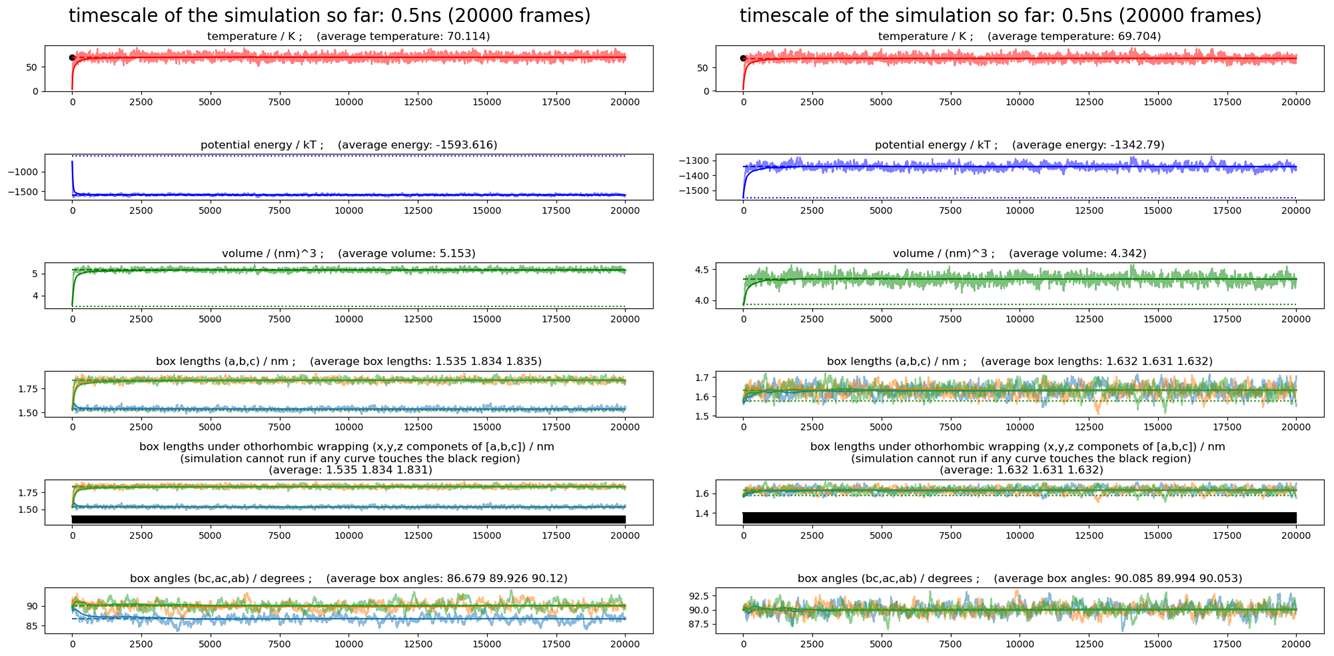

# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/argon/argon_LJ_0.7_0.8_equilibrated_Form_bcc_Cell_444_Temp_70.pdb
n_molecules: 128

# initialise_system:
set PME cutoff to: 0.7 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.5599999999999999 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
no corrections to self.system
n_mol =  128, n_atoms_mol = 1, N = 128, n_DOF = 381 (n_constraints = 3) 

# initialise_simulation:
set temperature: 70 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
minimise = True, minimising potential energy (u):
u before minimisation: -1748.6841753283873 kT
u after  minimisation: -1748.6841756356212 kT



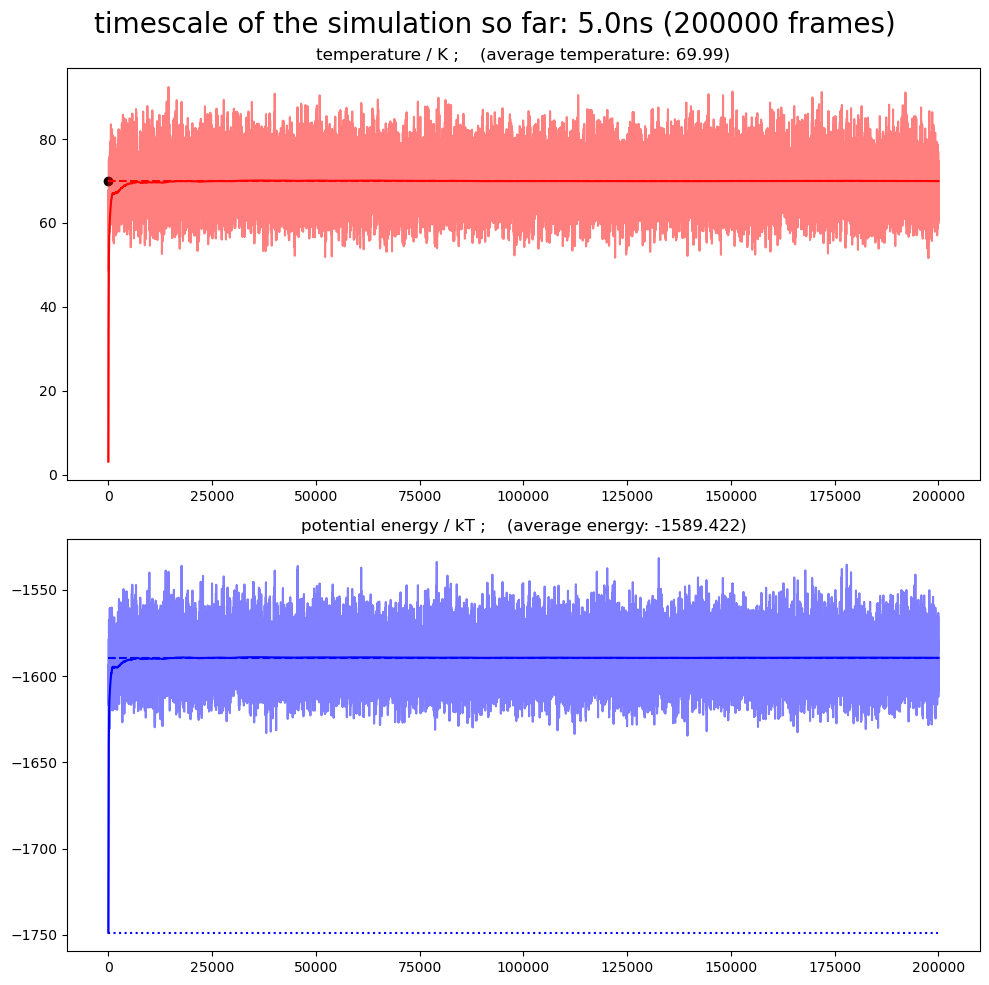

saved ./O/MM/molecules/argon//data/argon_LJ_0.7_0.8_NVT_dataset_Form_bcc_Cell_444_Temp_70
CHECK: average lattice potential energy: -12.417356948879338 /kT
# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/argon/argon_LJ_0.7_0.8_equilibrated_Form_fcc_Cell_333_Temp_70.pdb
n_molecules: 108

# initialise_system:
set PME cutoff to: 0.7 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.5599999999999999 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
no corrections to self.system
n_mol =  108, n_atoms_mol = 1, N = 108, n_DOF = 321 (n_constraints = 3) 

# initialise_simulation:
set temperature: 70 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
minimise = True, minimising potential energy (u):
u before minimisation: -1475.5338407861568 kT
u after  minimisation: -1475.5338407861568 kT



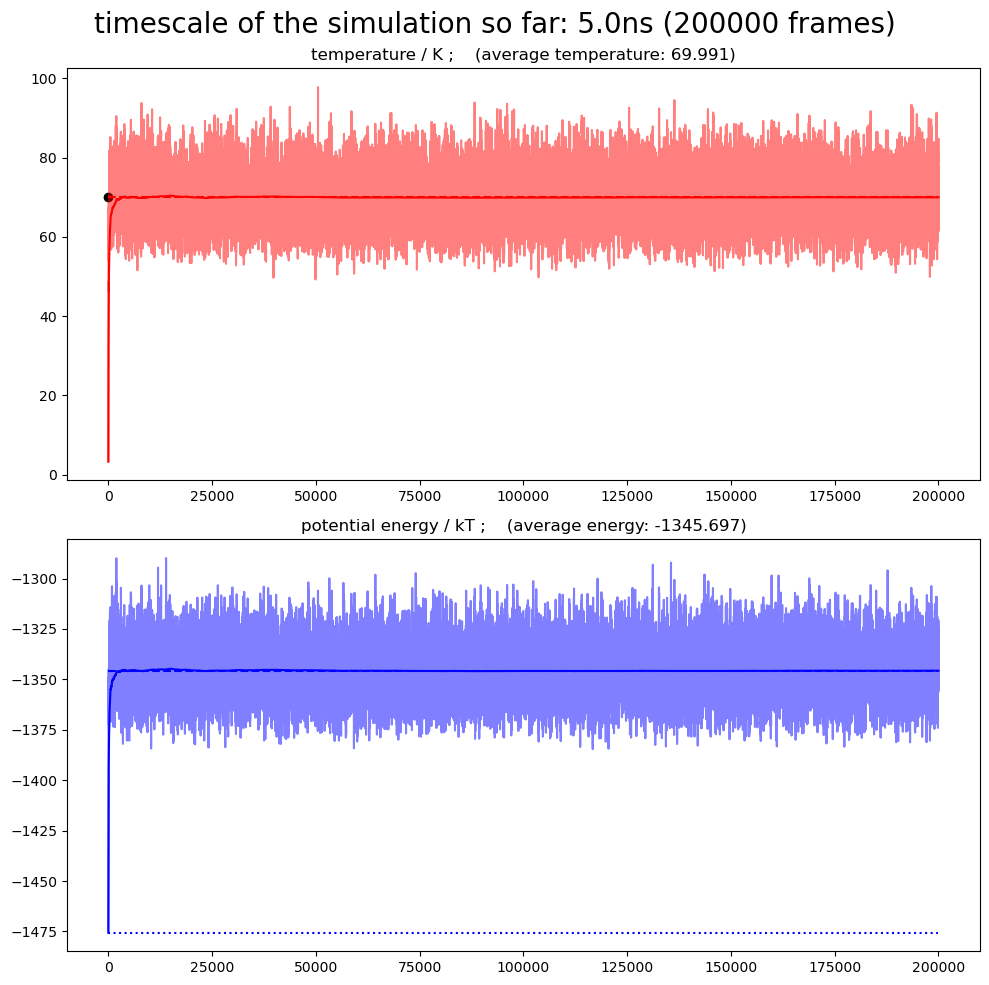

saved ./O/MM/molecules/argon//data/argon_LJ_0.7_0.8_NVT_dataset_Form_fcc_Cell_333_Temp_70
CHECK: average lattice potential energy: -12.460158042024274 /kT


In [4]:
# NVT simulations for PGM MD data was collected using this script:

for Form, cell_str in zip(['bcc','fcc'],['444', '333']):

    PDB = f'{PATH}/{name}_LJ_{LR_cutoff}_{SwitchingFunction_factor}_equilibrated_Form_{Form}_Cell_{cell_str}_Temp_{T}.pdb'
    sc = SingleComponent(PDB = PDB, n_atoms_mol = 1, name = name, FF_class = LJ)
    sc.initialise_system_(PME_cutoff=LR_cutoff, SwitchingFunction_factor = SwitchingFunction_factor)
    sc.initialise_simulation_(P = None,
                              T = T)
    sc.run_simulation_(200000,50)
    sc.plot_simulation_info_()
    sc.save_simulation_data_(f'{PATH}/data/{name}_LJ_{LR_cutoff}_{SwitchingFunction_factor}_NVT_dataset_Form_{Form}_Cell_{cell_str}_Temp_{T}'
                            )
    print('CHECK: average lattice potential energy:', sc.u.mean()/sc.n_mol,'/kT')
    del sc

''' the above srcipt outputs were:

# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/argon/argon_LJ_0.7_0.8_equilibrated_Form_bcc_Cell_444_Temp_70.pdb
n_molecules: 128

# initialise_system:
set PME cutoff to: 0.7 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.5599999999999999 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
n_mol =  128, n_atoms_mol = 1, N = 128, n_DOF = 381 (n_constraints = 3) 

# initialise_simulation:
set temperature: 70 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
minimise = True, minimising potential energy (u):
u before minimisation: -1760.2602030543603 kT
u after  minimisation: -1760.2602030543603 kT

frame: 200000 T sampled:69.974 T expected:70

saved ./O/MM/molecules/argon//data/argon_LJ_0.7_0.8_NVT_dataset_Form_bcc_Cell_444_Temp_70
CHECK: average lattice potential energy: -12.522673453444911 /kT

###############################################################################################
PLOT (LHS) below
###############################################################################################

# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/argon/argon_LJ_0.7_0.8_equilibrated_Form_fcc_Cell_333_Temp_70.pdb
n_molecules: 108

# initialise_system:
set PME cutoff to: 0.7 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.5599999999999999 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
n_mol =  108, n_atoms_mol = 1, N = 108, n_DOF = 321 (n_constraints = 3) 

# initialise_simulation:
set temperature: 70 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
minimise = True, minimising potential energy (u):
u before minimisation: -1482.4973694028226 kT
u after  minimisation: -1482.4973694028226 kT

frame: 200000 T sampled:70.079 T expected:70

saved ./O/MM/molecules/argon//data/argon_LJ_0.7_0.8_NVT_dataset_Form_fcc_Cell_333_Temp_70
CHECK: average lattice potential energy: -12.479304856735366 /kT

###############################################################################################
PLOT (RHS) below
###############################################################################################
'''

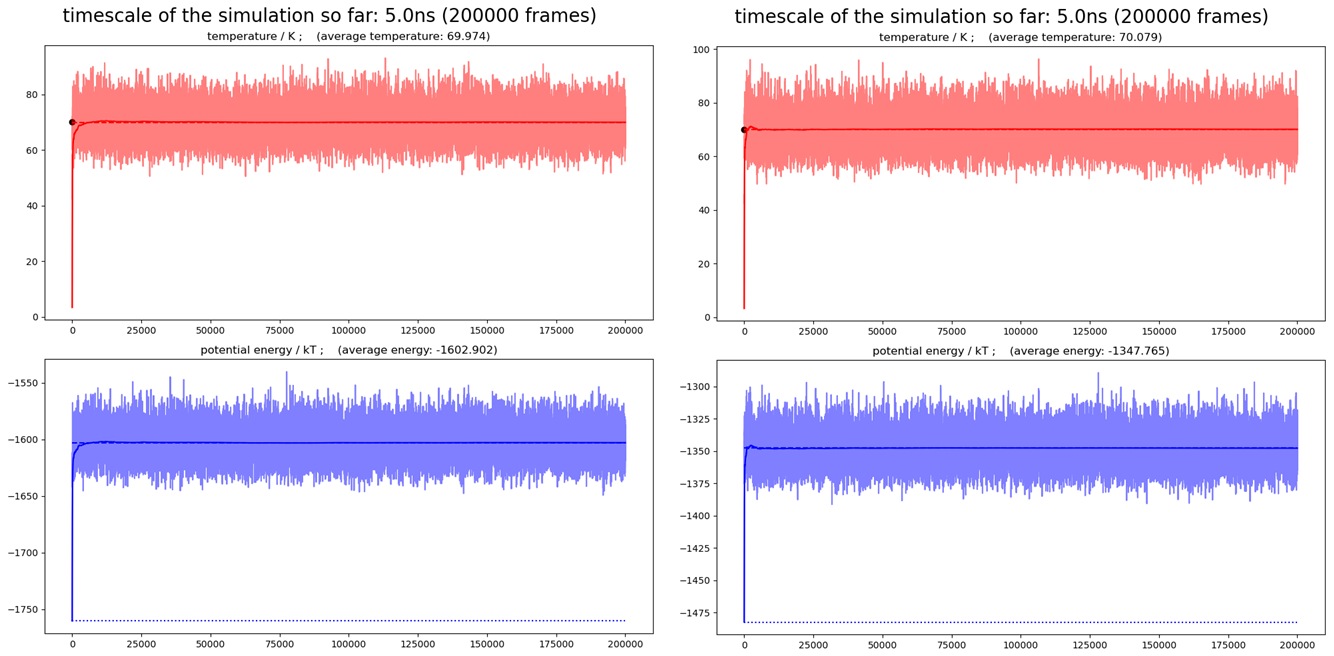

# without the (above) data, loading one of the instances of nn (below)

In [3]:
from O.NN.pgm_LJ import *
import pickle
Form, cell_str, T = 'fcc', '333', 70
n_layers = 1 # 1 enough, but 2 is better, while >2 was not a big improvement
fixed_atom = False # True does not work well (so far). False is not invariant to any permuations.
key = f'_{n_layers}layers_fixedatom_{fixed_atom}'
nn = NN_interface_sc_LJ_multimap(name = f'{name}_{FF_name}_{LR_cutoff}_{SwitchingFunction_factor}_Form_{Form}_Cell_{cell_str}_Temp_{T}'+key,
                                 paths_datasets=[0],
                                 running_in_notebook = True,
                                 fixed_atom = fixed_atom,
                                 model_class = PGMcrys_LJ,
                                 training=False)
nn.load_misc_()
nn.solve_BAR_using_pymbar_()
nn.load_model_()
nn.plot_result_(n_mol = nn.model.n_mol) 
print('lattice FE:', nn.nns[0].BAR_V_FE/nn.model.n_mol, '+/-',nn.nns[0].BAR_V_SE/nn.model.n_mol,'kT')

# NB: nn.model.n_mol should not be a variable for a permutationally invariant model
# NB: u_mean is missing from the nn instance here (was not saved at any point; might add that to be saved inside ic_map)

2025-07-29 17:17:28.369593: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-29 17:17:28.383064: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753831048.396938  421995 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753831048.400722  421995 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753831048.412445  421995 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

found saved BAR result
./O//NN/training_results/fitted_models/argon_LJ_0.7_0.8_Form_fcc_Cell_333_Temp_70_1layers_fixedatom_False_SC__model_


EOFError: Ran out of input

In [7]:
bin = './O/NN/training_results/fitted_models/argon_LJ_0.7_0.8_Form_fcc_Cell_333_Temp_70_1layers_fixedatom_False_SC__model_'
from io import BufferedReader
print("Is File: ", os.path.isfile(bin))
print(os.path.getsize(bin))
with open(bin, 'rb') as f:
    print(f.read(10))
    #print(f)
    #xun = pickle.Unpickler(f)
    #x = xun.load()
    #x = pickle.load(f)

Is File:  True
835345
b'\x80\x04\x95\xa2\x0c\x00\x00\x00\x00\x00'


# training

In [3]:
from O.NN.pgm_LJ import *

2025-07-29 17:17:51.696475: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-29 17:17:51.710222: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753831071.724167  422189 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753831071.727946  422189 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753831071.739728  422189 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

# training: Form 'fcc', cell '333', NVT(N=108, V=equilibrated, T=70K)

In [4]:
Form, cell_str, T = 'fcc', '333', 70
dataset_path = f'{PATH}/data/{name}_{FF_name}_{LR_cutoff}_{SwitchingFunction_factor}_NVT_dataset_Form_{Form}_Cell_{cell_str}_Temp_{T}'

In [5]:
n_layers = 1 # 1 enough, but 2 is better, while >2 was not a big improvement
fixed_atom = False # True does not work well (so far). False is not invariant to any permuations.

key = f'_{n_layers}layers_fixedatom_{fixed_atom}'
nn = NN_interface_sc_LJ_multimap(name = f'{name}_{FF_name}_{LR_cutoff}_{SwitchingFunction_factor}_Form_{Form}_Cell_{cell_str}_Temp_{T}'+key,
                                 paths_datasets=[dataset_path],
                                 running_in_notebook = True,
                                 fixed_atom = fixed_atom,
                                 model_class = PGMcrys_LJ)

# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/argon/argon_LJ_0.7_0.8_equilibrated_Form_fcc_Cell_333_Temp_70.pdb
n_molecules: 108

# initialise_system:
set PME cutoff to: 0.7 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.5599999999999999 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
no corrections to self.system
n_mol =  108, n_atoms_mol = 1, N = 108, n_DOF = 321 (n_constraints = 3) 

# initialise_simulation:
set temperature: 70 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
minimise = True, minimising potential energy (u):
u before minimisation: -1475.5338407861568 kT
u after  minimisation: -1475.5338407861568 kT



In [6]:
nn.set_ic_map_step1()
nn.set_ic_map_step2()
nn.set_ic_map_step3()

molecule with 1 atoms, of which 1 are heavy atoms, and the rest are 0 hydrogens.
set_ABCD_ : nothing was defined
COM removed from data, without taking into account PBC of the box
inds_rand attempt: 1
found !
checking that PES matches the sampled dataset:
errT: -9.405453770341409e-07 -0.00012453214094421128 0.0001114234944452619
errV: -1.074909004046276e-06 -0.0001507494334873627 0.00012125497937631735
initialising on 200000 datapoints provided
SCmap.initalise_ : a single box provided -> Cartesian transformed by SCmap.
ic_map inversion errors on a small random batch:
positons: 5.1915646e-05
volume: 0.0
!! 1.0000609


In [7]:
# the n_mol (= N atoms), here is fairly high, which turns out to be quite expensive (for attention-based the coupling of molecules)

evaluation_batch_size = 1000 # usually 5000 or 10000, but here can use a cheaper smaller number (1000)
learning_rate = 0.001 # the fast learning rate.

nn.set_model(n_layers=n_layers, evaluation_batch_size=evaluation_batch_size, learning_rate=learning_rate)

There are 6278892 trainable parameters in this model, among 18 trainable weights.
[To see dimensionalities of the trainable weights print(list(self.shapes_trainable_weights)).] 


2025-07-29 17:18:34.773713: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:501] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.13GiB (rounded to 2289800192)requested by op einsum_2/Einsum
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2025-07-29 17:18:34.773805: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1058] BFCAllocator dump for GPU_0_bfc
2025-07-29 17:18:34.773827: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1065] Bin (256): 	Total Chunks: 445, Chunks in use: 387. 111.2KiB allocated for chunks. 96.8KiB in use in bin. 1.9KiB client-requested in use in bin.
2025-07-29 17:18:34.773840: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1065] Bin (512): 	Total Chunks: 2, Chunks in use: 2. 1.0KiB allocated for chunks. 1.0KiB in use in bin. 840B client-requested in use in bin.
20

ResourceExhaustedError: Graph execution error:

Detected at node einsum_2/Einsum defined at (most recent call last):
  File "/home/aidan/miniconda3/envs/fecrys/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/aidan/miniconda3/envs/fecrys/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/aidan/miniconda3/envs/fecrys/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/aidan/miniconda3/envs/fecrys/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/aidan/miniconda3/envs/fecrys/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/aidan/miniconda3/envs/fecrys/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 211, in start

  File "/home/aidan/miniconda3/envs/fecrys/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/home/aidan/miniconda3/envs/fecrys/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/home/aidan/miniconda3/envs/fecrys/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/aidan/miniconda3/envs/fecrys/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/aidan/miniconda3/envs/fecrys/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/aidan/miniconda3/envs/fecrys/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/aidan/miniconda3/envs/fecrys/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/aidan/miniconda3/envs/fecrys/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/aidan/miniconda3/envs/fecrys/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/aidan/miniconda3/envs/fecrys/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/aidan/miniconda3/envs/fecrys/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3077, in run_cell

  File "/home/aidan/miniconda3/envs/fecrys/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3132, in _run_cell

  File "/home/aidan/miniconda3/envs/fecrys/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/aidan/miniconda3/envs/fecrys/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3336, in run_cell_async

  File "/home/aidan/miniconda3/envs/fecrys/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3519, in run_ast_nodes

  File "/home/aidan/miniconda3/envs/fecrys/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3579, in run_code

  File "/tmp/ipykernel_422189/1211242188.py", line 6, in <module>

  File "/home/aidan/research/sim_files/FEcrys/O/NN/pgm_LJ.py", line 760, in set_model

  File "/home/aidan/research/sim_files/FEcrys/O/NN/pgm_LJ.py", line 557, in test_inverse_

  File "/home/aidan/research/sim_files/FEcrys/O/NN/pgm.py", line 590, in forward

  File "/home/aidan/research/sim_files/FEcrys/O/NN/pgm.py", line 582, in forward_graph_

  File "/home/aidan/research/sim_files/FEcrys/O/NN/pgm.py", line 527, in forward_

  File "/home/aidan/research/sim_files/FEcrys/O/NN/pgm_LJ.py", line 513, in _forward_coupling_

  File "/home/aidan/research/sim_files/FEcrys/O/NN/pgm_LJ.py", line 515, in _forward_coupling_

  File "/home/aidan/research/sim_files/FEcrys/O/NN/pgm_LJ.py", line 391, in transform_

OOM when allocating tensor with shape[1000,107,107,50] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node einsum_2/Einsum}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_forward_graph__44474]

In [10]:
nn.set_trainer()

'28.96 2999 2999 59 AVMD_T:[-5.09252407] AVMD_V:[np.float64(-5.082765223080651)] || FE:[np.float64(-4.841019364867238)] SD:[np.float64(0.014366433937234179)]'

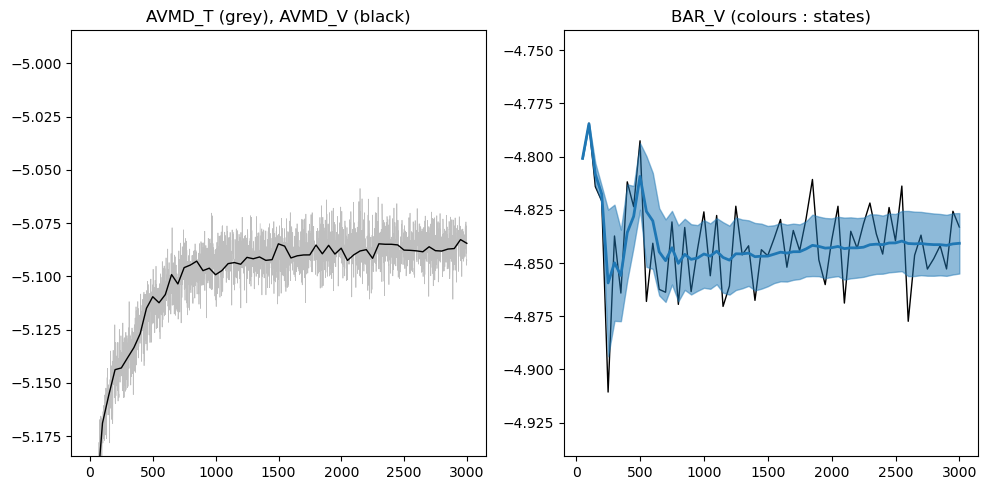

training time so far: 29.01 minutes
saved ./O//NN/training_results/misc/argon_LJ_0.7_0.8_Form_fcc_Cell_333_Temp_70_1layers_fixedatom_False_SC__misc_
misc training outputs were saved


In [11]:
training_batch_size = 100 # this is small also (faster), usually using 1000
n_batches = 3000 # enough here

nn.train(training_batch_size=training_batch_size, n_batches=n_batches, f_halfwindow_visualisation=0.1)

In [12]:
nn.load_misc_()
nn.load_energies_during_training_()

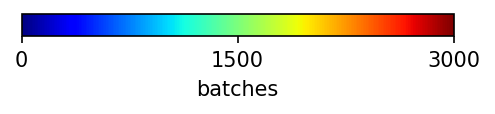

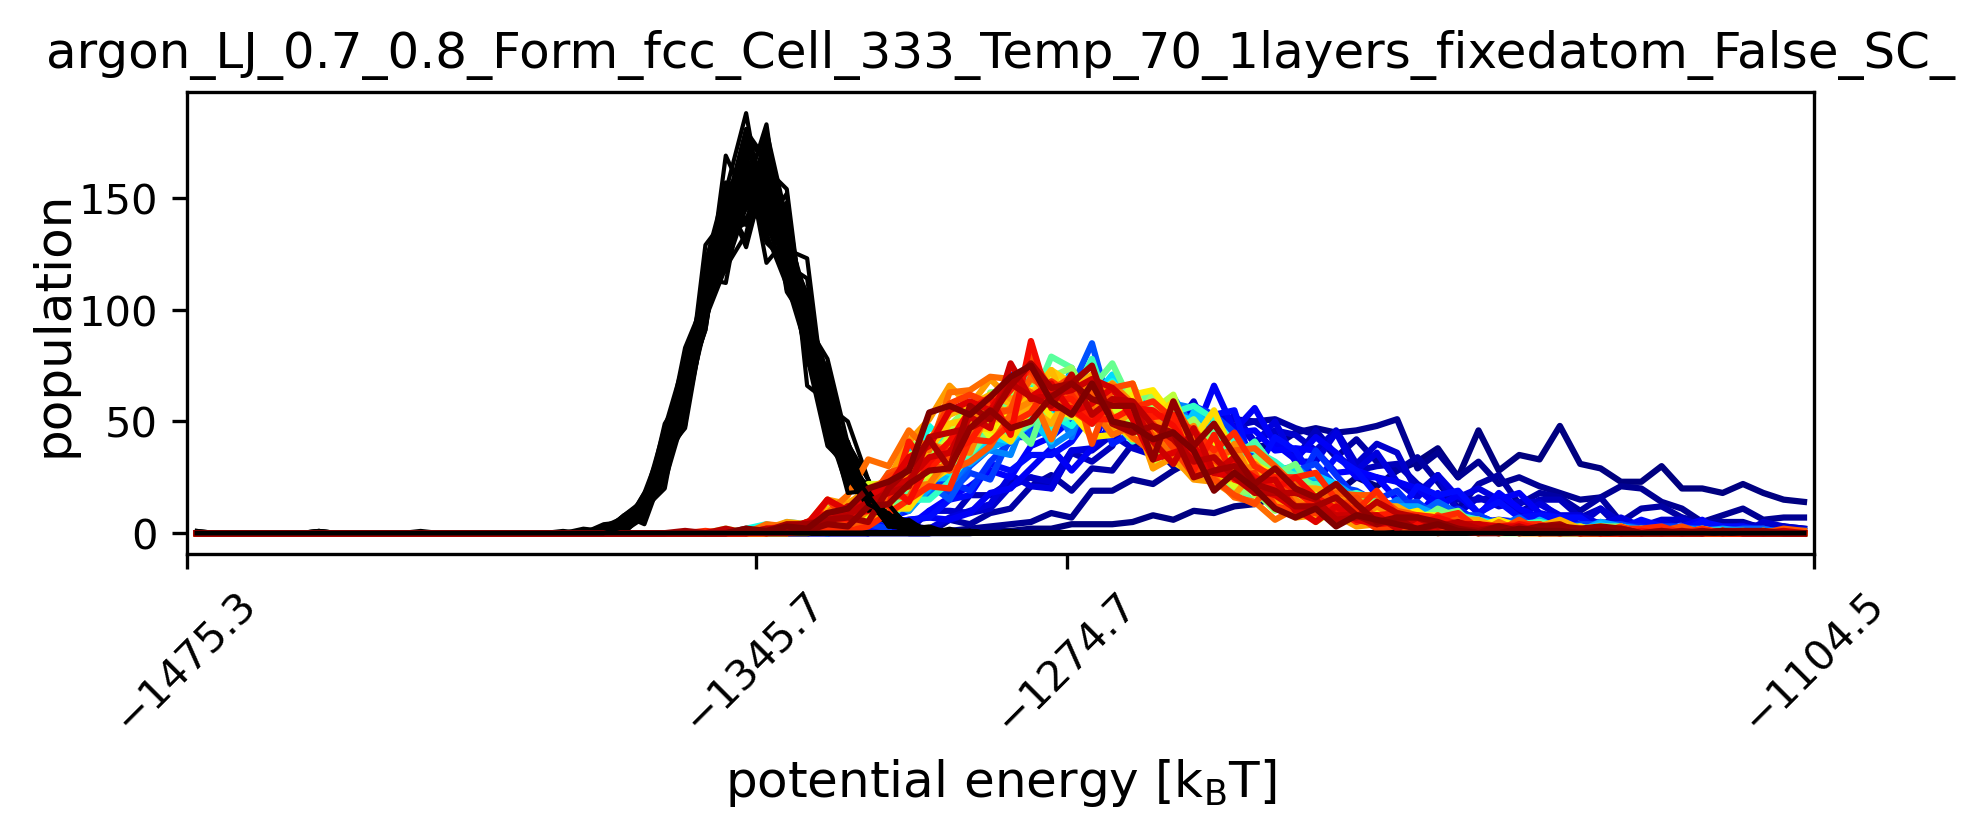

In [13]:
nn.plot_energies_during_training_()
# small overlap, but somehow this is enough for normal reweighting in this system

In [14]:
nn.solve_BAR_using_pymbar_(rerun=True)

59
BAR: T estimate59skipped
saved ./O//NN/training_results/BAR/argon_LJ_0.7_0.8_Form_fcc_Cell_333_Temp_70_1layers_fixedatom_False_SC__BAR__BAR_output_crystal_index=0
saved BAR result


n_mol= 108
-4.840746376299871 +/- 0.014187875837162855 final: -4.84074637629958 +/- 0.01844917725692621
lattice FE: -4.84074637629958 +/- 0.01844917725692621 kT


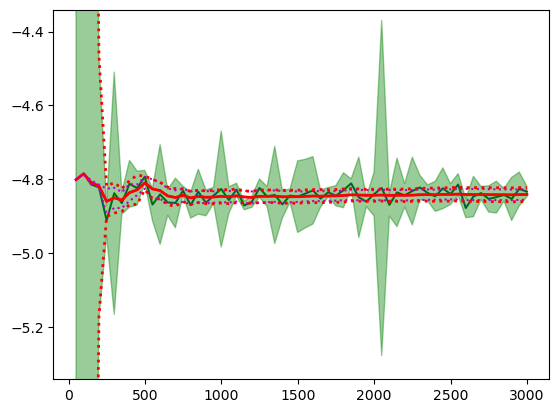

In [15]:
n_mol = nn.nns[0].sc.n_mol

print('n_mol=', n_mol)
nn.plot_result_(n_mol=n_mol, window=0.5)

print('lattice FE:', nn.nns[0].BAR_V_FE/n_mol, '+/-',nn.nns[0].BAR_V_SE/n_mol,'kT')

In [16]:
print('lattice average potential energy:', nn.nns[0].u_mean / n_mol)

lattice average potential energy: -12.460158042024274


In [17]:
r_MD = np.array(nn.nns[0].r_validation)
print(r_MD.shape)
r_BG = nn.sample_model_(r_MD.shape[0])
print(r_BG.shape)

(40000, 108, 3)
(40000, 108, 3)


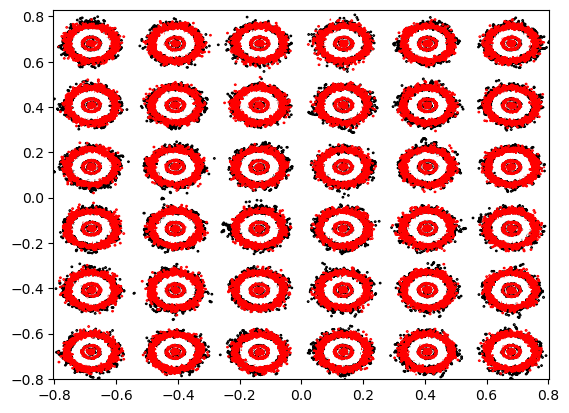

In [18]:
#plt.scatter(r_MD[...,1], r_MD[...,2],s=1)
#plt.scatter(r_BG[...,1], r_BG[...,2],s=1)

plot_2D_histogram_(r_MD[...,1], r_MD[...,2], colors='black', bins=1000, levels=2)
plot_2D_histogram_(r_BG[...,1], r_BG[...,2], colors='red',   bins=1000, levels=2)

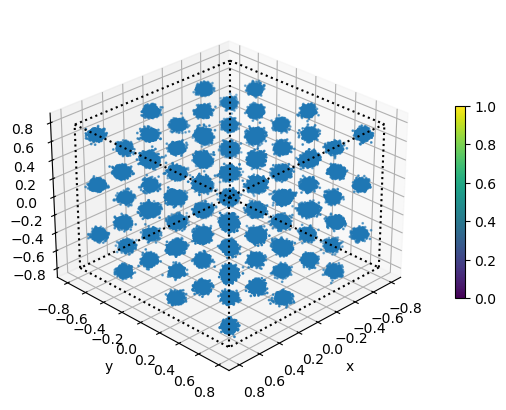

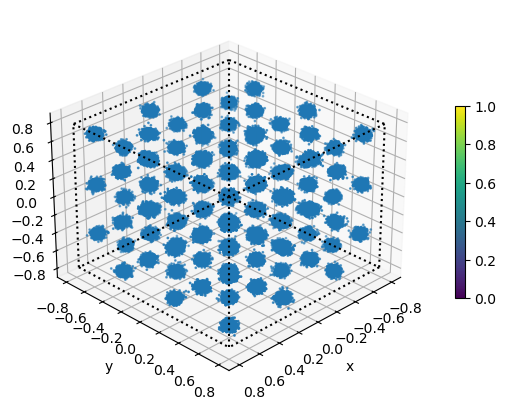

In [19]:
plot_points_3D_(r_MD[:1000].reshape([r_MD[:1000].shape[0]*r_MD.shape[1],3]), s=1, view_elev_azim=[0,1])
plot_points_3D_(r_BG[:1000].reshape([r_BG[:1000].shape[0]*r_BG.shape[1],3]), s=1, view_elev_azim=[0,1])

In [28]:
nn.save_model_() # not saving samples

AttributeError: Can't pickle local object 'Layer._initialize_tracker.<locals>.<lambda>'

In [ ]:
# check that model loads:

In [21]:
n_layers = 1 # 1 enough, but 2 is better, while >2 was not a big improvement
fixed_atom = False # True does not work well (so far). False is not invariant to any permuations.

key = f'_{n_layers}layers_fixedatom_{fixed_atom}'
nn = NN_interface_sc_LJ_multimap(name = f'{name}_{FF_name}_{LR_cutoff}_{SwitchingFunction_factor}_Form_{Form}_Cell_{cell_str}_Temp_{T}'+key,
                                 paths_datasets=[dataset_path],
                                 running_in_notebook = True,
                                 fixed_atom = fixed_atom,
                                 model_class = PGMcrys_LJ)

# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/argon/argon_LJ_0.7_0.8_equilibrated_Form_fcc_Cell_333_Temp_70.pdb
n_molecules: 108

# initialise_system:
set PME cutoff to: 0.7 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.5599999999999999 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
no corrections to self.system
n_mol =  108, n_atoms_mol = 1, N = 108, n_DOF = 321 (n_constraints = 3) 

# initialise_simulation:
set temperature: 70 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
minimise = True, minimising potential energy (u):
u before minimisation: -1475.5338407861568 kT
u after  minimisation: -1475.5338407861568 kT



In [22]:
nn.load_model_()

EOFError: Ran out of input

In [45]:
nn.evaluation_batch_size = 1000
r_BG = nn.sample_model_(40000)
print(r_BG.shape)

(40000, 108, 3)


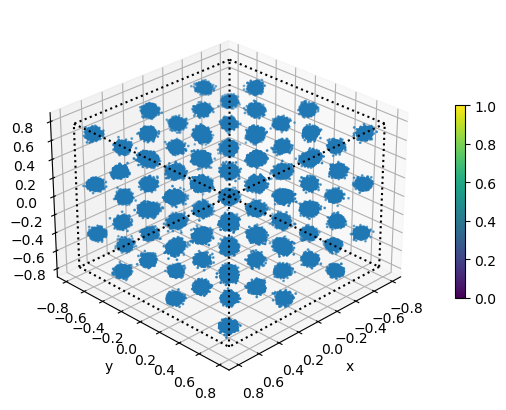

In [46]:
plot_points_3D_(r_BG[:1000].reshape([r_BG[:1000].shape[0]*r_BG.shape[1],3]), s=1, view_elev_azim=[0,1])
# model loads, can be sampled again.

# training: Form 'bcc', cell '444', NVT(N=128, V=equilibrated, T=70K)

In [23]:
Form, cell_str, T = 'bcc', '444', 70
dataset_path = f'{PATH}/data/{name}_LJ_{LR_cutoff}_{SwitchingFunction_factor}_NVT_dataset_Form_{Form}_Cell_{cell_str}_Temp_{T}'

In [24]:
n_layers = 1 # 1 enough, but 2 is better, while >2 was not a big improvement
fixed_atom = False # True does not work well (so far). False is not invariant to any permuations.

key = f'_{n_layers}layers_fixedatom_{fixed_atom}'
nn = NN_interface_sc_LJ_multimap(name = f'{name}_{FF_name}_{LR_cutoff}_{SwitchingFunction_factor}_Form_{Form}_Cell_{cell_str}_Temp_{T}'+key,
                                 paths_datasets=[dataset_path],
                                 running_in_notebook = True,
                                 fixed_atom = fixed_atom,
                                 model_class = PGMcrys_LJ)

# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/argon/argon_LJ_0.7_0.8_equilibrated_Form_bcc_Cell_444_Temp_70.pdb
n_molecules: 128

# initialise_system:
set PME cutoff to: 0.7 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.5599999999999999 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
no corrections to self.system
n_mol =  128, n_atoms_mol = 1, N = 128, n_DOF = 381 (n_constraints = 3) 

# initialise_simulation:
set temperature: 70 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
minimise = True, minimising potential energy (u):
u before minimisation: -1748.6841753283873 kT
u after  minimisation: -1748.6841756356212 kT



In [25]:
nn.set_ic_map_step1()
nn.set_ic_map_step2()
nn.set_ic_map_step3()
evaluation_batch_size = 1000
learning_rate = 0.001
nn.set_model(n_layers=n_layers, evaluation_batch_size=evaluation_batch_size, learning_rate=learning_rate)

# NB: the model has the same number of parameters but the number of molecules is higher.

molecule with 1 atoms, of which 1 are heavy atoms, and the rest are 0 hydrogens.
set_ABCD_ : nothing was defined
COM removed from data, without taking into account PBC of the box
inds_rand attempt: 1
found !
checking that PES matches the sampled dataset:
errT: -1.9212359902667233e-06 -0.00013682149688065692 0.00013886972260479524
errV: 5.567078233070788e-07 -0.00017696672648526146 0.00013600220631815318
initialising on 200000 datapoints provided
SCmap.initalise_ : a single box provided -> Cartesian transformed by SCmap.
ic_map inversion errors on a small random batch:
positons: 5.3733587e-05
volume: 6.1035156e-05
0.99981236
There are 6278892 trainable parameters in this model, among 18 trainable weights.
[To see dimensionalities of the trainable weights print(list(self.shapes_trainable_weights)).] 
inv_test_res0 ([[np.float32(7.81765e-06), np.float32(5.3733587e-05)], [np.float32(2.3803711e-06), np.float32(-0.00018310547), np.float32(0.00012207031)]], [[[np.float32(0.00022973673), np.fl

In [26]:
nn.set_trainer()

'33.6 2999 2999 59 AVMD_T:[-5.09753777] AVMD_V:[np.float64(-5.090376856203239)] || FE:[np.float64(-4.838224436300875)] SD:[np.float64(0.019392206921867584)]'

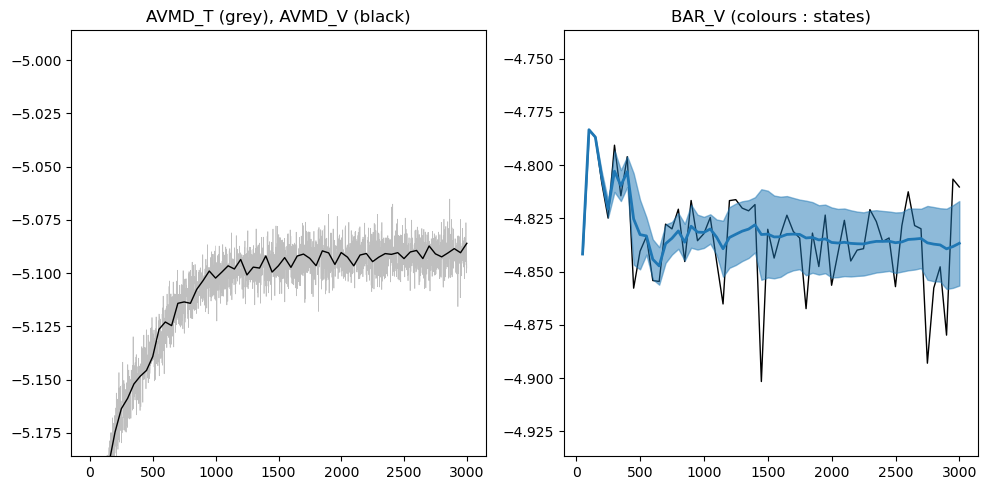

training time so far: 33.66 minutes
saved ./O//NN/training_results/misc/argon_LJ_0.7_0.8_Form_bcc_Cell_444_Temp_70_1layers_fixedatom_False_SC__misc_
misc training outputs were saved


In [27]:
training_batch_size = 100 # this is small also (faster), usually using 1000
n_batches = 3000 # enough here

nn.train(training_batch_size=training_batch_size, n_batches=n_batches, f_halfwindow_visualisation=0.1)

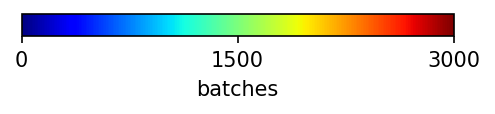

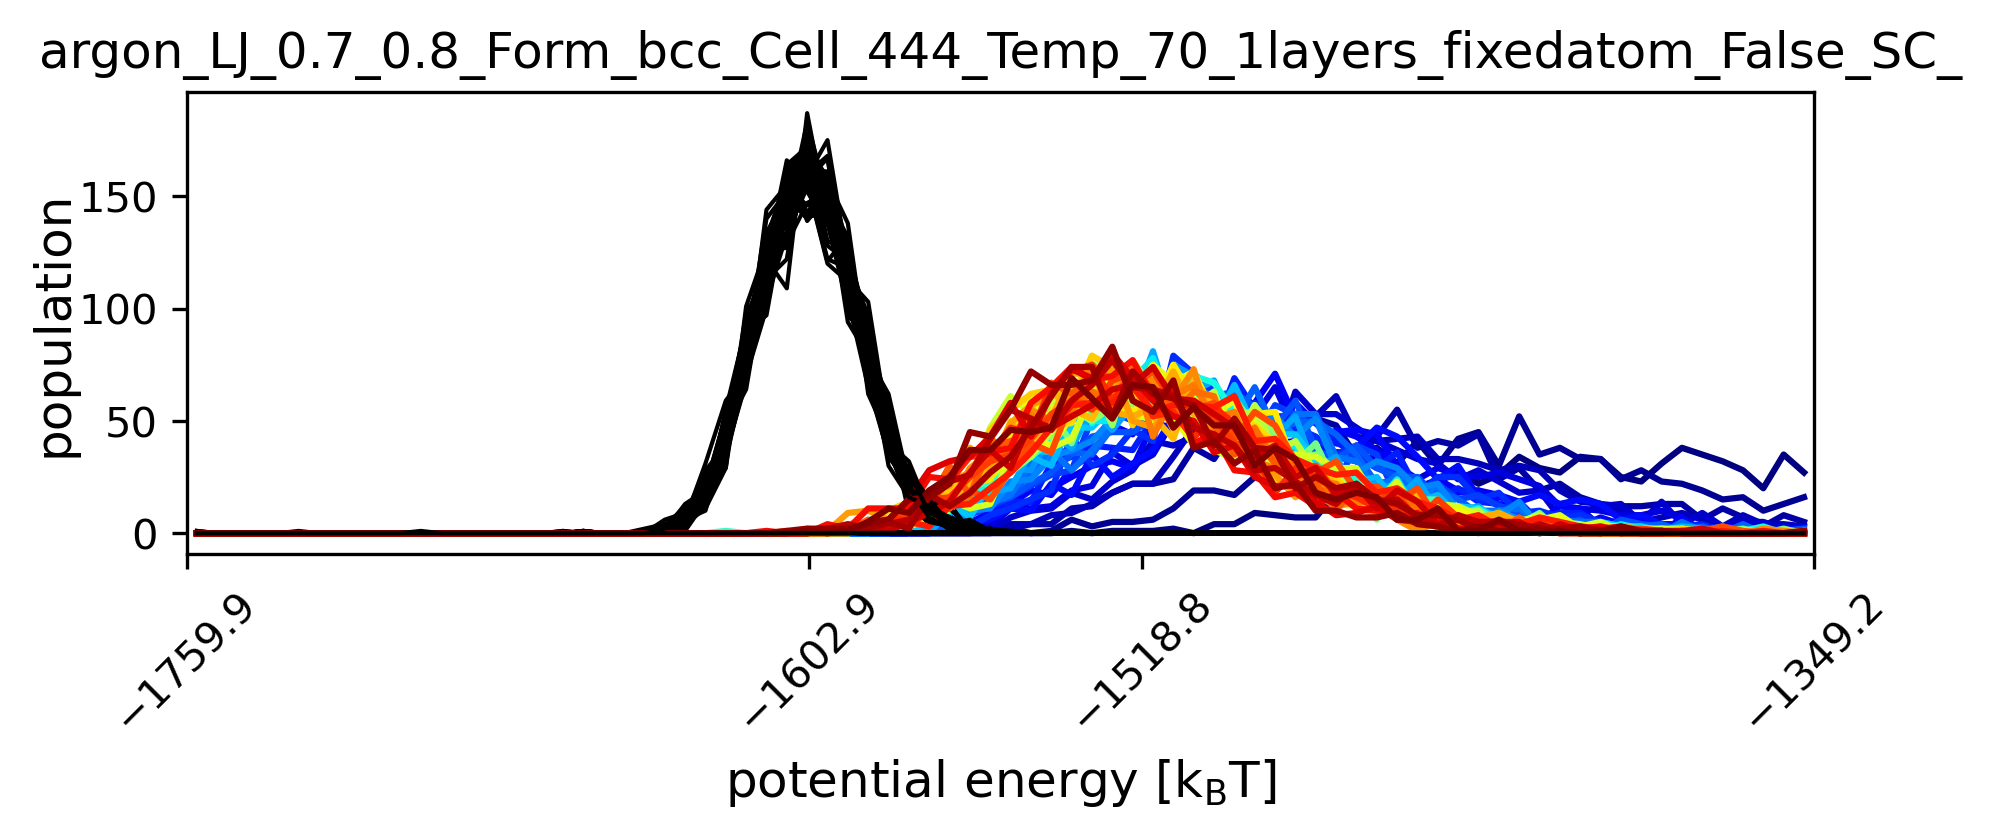

In [52]:
nn.load_misc_()
nn.load_energies_during_training_()
nn.plot_energies_during_training_()

In [53]:
nn.solve_BAR_using_pymbar_(rerun=True)

59
BAR: T estimate59skipped
saved ./O//NN/training_results/BAR/argon_LJ_0.7_0.8_Form_bcc_Cell_444_Temp_70_1layers_fixedatom_False_SC__BAR__BAR_output_crystal_index=0
saved BAR result


n_mol= 128
-4.844112576719554 +/- 0.011829022068645978 final: -4.844112576720076 +/- 0.018753177874183617
lattice FE: -4.844112576720076 +/- 0.018753177874183617 kT


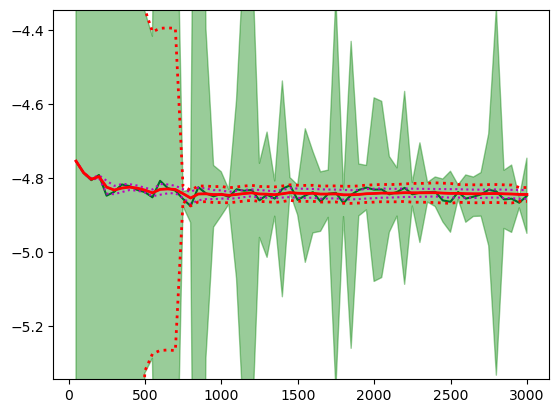

In [54]:
n_mol = nn.nns[0].sc.n_mol
print('n_mol=', n_mol)
nn.plot_result_(n_mol=n_mol, window=0.5)
print('lattice FE:', nn.nns[0].BAR_V_FE/n_mol, '+/-',nn.nns[0].BAR_V_SE/n_mol,'kT')

In [55]:
print('lattice average potential energy:', nn.nns[0].u_mean / n_mol)

lattice average potential energy: -12.522673453444911


In [57]:
r_MD = np.array(nn.nns[0].r_validation)
print(r_MD.shape)
r_BG = nn.sample_model_(r_MD.shape[0])
print(r_BG.shape)

(40000, 128, 3)
(40000, 128, 3)


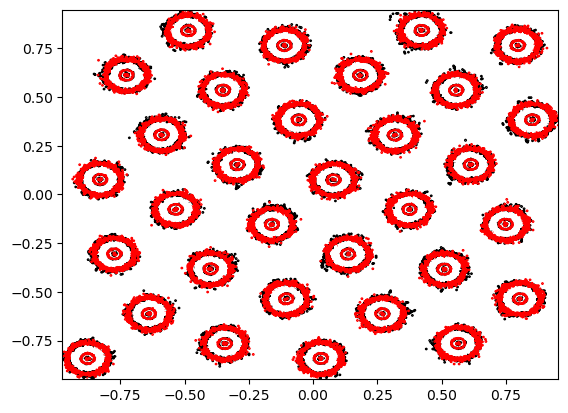

In [58]:
plot_2D_histogram_(r_MD[...,1], r_MD[...,2], colors='black', bins=1000, levels=2)
plot_2D_histogram_(r_BG[...,1], r_BG[...,2], colors='red',   bins=1000, levels=2)

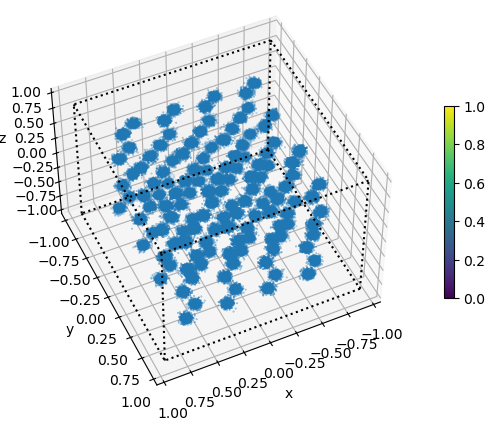

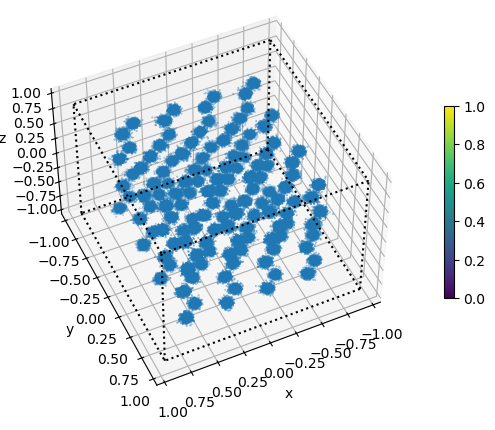

In [85]:
plot_points_3D_(r_MD[:1000].reshape([r_MD[:1000].shape[0]*r_MD.shape[1],3]), s=0.1)
plot_points_3D_(r_BG[:1000].reshape([r_BG[:1000].shape[0]*r_BG.shape[1],3]), s=0.1)

In [86]:
nn.save_model_() # not saving samples

saved ./O//NN/training_results/fitted_models/argon_LJ_0.7_0.8_Form_bcc_Cell_444_Temp_70_1layers_fixedatom_False_SC__model_


In [88]:
n_layers = 1 # 1 enough, but 2 is better, while >2 was not a big improvement
fixed_atom = False # True does not work well (so far). False is not invariant to any permuations.

key = f'_{n_layers}layers_fixedatom_{fixed_atom}'
nn = NN_interface_sc_LJ_multimap(name = f'{name}_{FF_name}_{LR_cutoff}_{SwitchingFunction_factor}_Form_{Form}_Cell_{cell_str}_Temp_{T}'+key,
                                 paths_datasets=[dataset_path],
                                 running_in_notebook = True,
                                 fixed_atom = fixed_atom,
                                 model_class = PGMcrys_LJ)

# initialise_object (SingleComponent) with LJ FF, from the input file (PDB):
 ./O//MM/molecules/argon/argon_LJ_0.7_0.8_equilibrated_Form_bcc_Cell_444_Temp_70.pdb
n_molecules: 128

# initialise_system:
set PME cutoff to: 0.7 nm
removeCMMotion active: True
set SwitchingFunction to 0.8 * PME_cutoff = 0.5599999999999999 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
n_mol =  128, n_atoms_mol = 1, N = 128, n_DOF = 381 (n_constraints = 3) 

# initialise_simulation:
set temperature: 70 Kelvin
set integration timestep: 0.0005 ps
set collision rate (friction ceofficent): 1 /ps
minimise = True, minimising potential energy (u):
u before minimisation: -1760.2602030543603 kT
u after  minimisation: -1760.2602030543603 kT



In [89]:
nn.load_model_()
nn.evaluation_batch_size = 1000
r_BG = nn.sample_model_(40000)
print(r_BG.shape)

(40000, 128, 3)


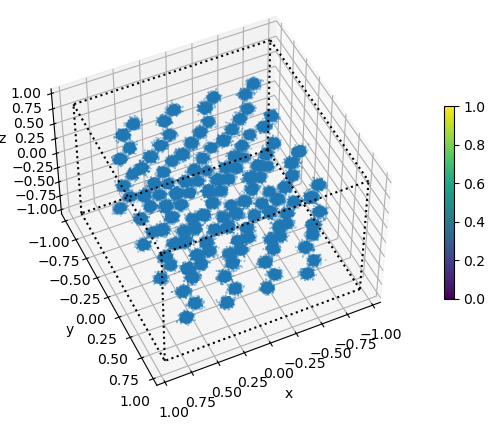

In [90]:
plot_points_3D_(r_BG[:1000].reshape([r_BG[:1000].shape[0]*r_BG.shape[1],3]), s=0.1)
# model loads, can be sampled again.

# results

In [ ]:
##  'fcc', '333', 70
# lattice average potential energy: -12.479304856735366
# lattice FE: -4.8440452794790305 +/- 0.019041520054226792 kT

## 'bcc', '444', 70
# lattice average potential energy: -12.522673453444911
# lattice FE: -4.844112576720076 +/- 0.018753177874183617 kT

In [97]:
u_fcc = -12.479304856735366
f_fcc = -4.8440452794790305
se_fcc = 0.019041520054226792

u_bcc = -12.522673453444911
f_bcc = -4.844112576720076
se_bcc = 0.018753177874183617

u_Forms = np.array([u_fcc, u_bcc])
f_Forms = np.array([f_fcc, f_bcc])
se_Forms = np.array([se_fcc, se_bcc])


[6.7297241e-05 0.0000000e+00] [0.0377947  0.03750636]


Text(0.5, 1.0, 'differences between: black:average potential energy, blue:fe')

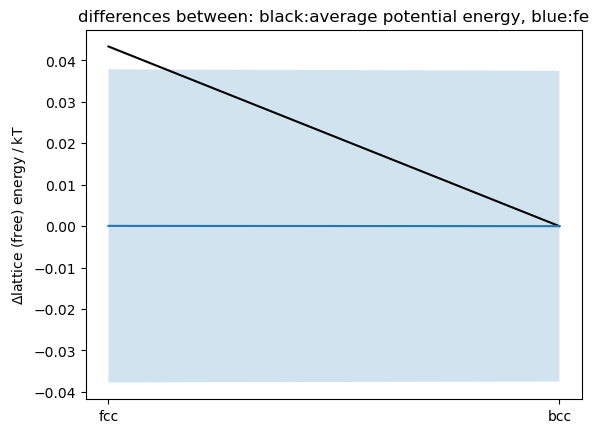

In [116]:
plt.plot(u_Forms - u_Forms.min(), color='black')
ind_min = 1

delta_f = f_Forms - f_Forms[ind_min]
se_delta_f = se_Forms + se_Forms[ind_min]

print(delta_f, se_delta_f)

plt.plot(delta_f)
plt.fill_between([0,1], delta_f-se_delta_f, delta_f+se_delta_f, alpha=0.2)

plt.xticks([0,1], ['fcc','bcc'])
plt.ylabel(r'$\Delta \text{lattice (free) energy} \; / \; \text{kT}$')
plt.title('differences between: black:average potential energy, blue:fe')

# both forms ranked the same with this FF (at settings: {LR_cutoff}_{SwitchingFunction_factor})

# previous attempts, problems, interpretation and further work

two other models were tried (fixed_atom = True with different settings, and a naive model without any weight-sharing). Not discussing the associated results here, but can show. They both had problems that prevented accurate FEs, for two opposite reasons; underfitting, and insufficient ergodicity of MD data (at this low T), respectively. The suboptimal ergodicity is related in this case of permutations of the particles across the supercell. Making the model pay less attention to permutations, resolved the issue, but the energy overlap became worse. The current model that worked (this JN) is trying to balance between the two extremes without sampling more data or coming up with anything new.

The former model is clearly preferred for further work (invariant to …), because it would require minimum training data, and generalise to systems of different size. The ic_map used here (with fixed atom True) may be sufficient for such hypothetical model for single component monatomic systems, but the exact coupling connectivity inside the trainable part of the model can do with (needs) further work. Prior to thinking about that, might add a CNF-based approach here later (in a few months); to compare with splines (+ maybe 'unfocused' splines are not accurate enough as they were currently tested with fixed_atom = True). 

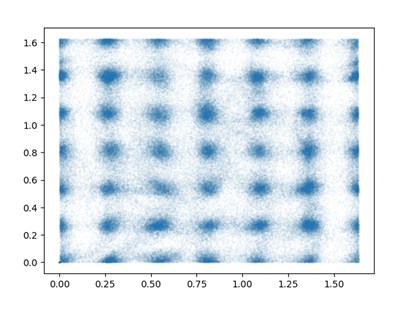